In [29]:
using DataFrames
using LinearAlgebra
using Statistics
using CSV
using StatsPlots

## Zadanie 1

In [18]:
x = rand(1000)
A = rand(1000, 1000)
b = A * x

1000-element Vector{Float64}:
 236.65997033036737
 245.8028199216229
 248.70825270499643
 239.90682995889813
 246.98164259245317
 249.25496307500816
 250.49325744836244
 249.83229645122876
 249.10061202827708
 250.66166077768696
 244.97411630171433
 245.0973956051933
 252.3597042852239
   ⋮
 247.01201031601056
 252.7351506745254
 251.5410013855933
 249.50596726597377
 249.99316768603038
 247.02333285075466
 247.26344420140106
 248.1375699110786
 244.87498151794364
 244.66839981726335
 252.94232760761537
 246.20570680148296

In [23]:
df = DataFrame(method=String[], quality=Float64[], time=Float64[])
for i in 1:10
    inv(A) * b
    time = @elapsed res = inv(A) * b
    push!(df, ["Inverse", abs(norm(x) - norm(res)), time])
    
    A \ b
    time = @elapsed res = A \ b
    push!(df, ["Division", abs(norm(x) - norm(res)), time])
    
    factorize(A) \ b
    time = @elapsed res = factorize(A) \ b
    push!(df, ["Factorization", abs(norm(x) - norm(res)), time])
end
df

Row,method,quality,time
,String,Float64,Float64
1,Inverse,4.1922e-13,0.0446518
2,Division,2.41585e-13,0.0168652
3,Factorization,2.41585e-13,0.0247291
4,Inverse,4.1922e-13,0.043269
5,Division,2.41585e-13,0.016616
6,Factorization,2.41585e-13,0.0167536
7,Inverse,4.1922e-13,0.0441302
8,Division,2.41585e-13,0.0195115
9,Factorization,2.41585e-13,0.0217071


In [27]:
df1 = groupby(df, [:method, :quality])
df2 = combine(df1, :time => mean, :time => std)

Row,method,quality,time_mean,time_std
,String,Float64,Float64,Float64
1,Inverse,4.1922e-13,0.0454357,0.00453953
2,Division,2.41585e-13,0.0187622,0.00261974
3,Factorization,2.41585e-13,0.0200015,0.00361741


## Zadanie 2

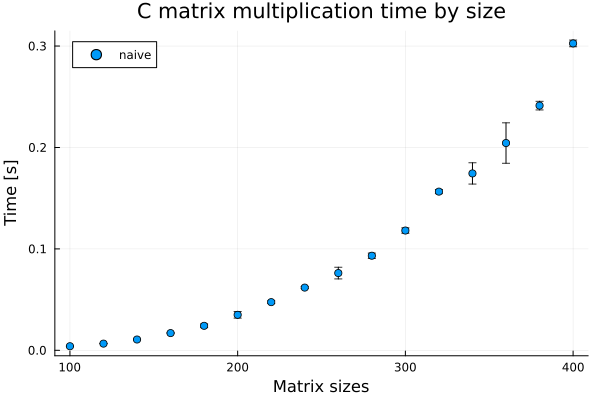

In [47]:
cdf = CSV.read("cresults.csv", delim=",", DataFrame)
cdf = groupby(cdf, [:size, :multiplication_type])
cdf = combine(cdf, :time => mean, :time => std)
cdf = filter(:multiplication_type => n -> n == "naive", cdf)
c_plot = @df cdf scatter(:size, :time_mean, group=:multiplication_type, yerr=:time_std, title = "C matrix multiplication time by size", ylabel="Time [s]", xlabel="Matrix sizes")

In [48]:
x = collect(100:20:400)
y = cdf[!, :time_mean]

16-element Vector{Float64}:
 0.0040363000000000005
 0.006600400000000001
 0.0106541
 0.016988499999999997
 0.024166299999999998
 0.0350115
 0.0475018
 0.06184759999999999
 0.07617349999999999
 0.0932781
 0.1181082
 0.1564727
 0.17441389999999998
 0.20437580000000005
 0.24128599999999997
 0.30258670000000004

In [49]:
A = zeros(length(x), 4)
for col in 1:4
    ex = 4 - col
    A[:, col] = x.^ex
end
A

16×4 Matrix{Float64}:
 1.0e6      10000.0  100.0  1.0
 1.728e6    14400.0  120.0  1.0
 2.744e6    19600.0  140.0  1.0
 4.096e6    25600.0  160.0  1.0
 5.832e6    32400.0  180.0  1.0
 8.0e6      40000.0  200.0  1.0
 1.0648e7   48400.0  220.0  1.0
 1.3824e7   57600.0  240.0  1.0
 1.7576e7   67600.0  260.0  1.0
 2.1952e7   78400.0  280.0  1.0
 2.7e7      90000.0  300.0  1.0
 3.2768e7  102400.0  320.0  1.0
 3.9304e7  115600.0  340.0  1.0
 4.6656e7  129600.0  360.0  1.0
 5.4872e7  144400.0  380.0  1.0
 6.4e7     160000.0  400.0  1.0

In [50]:
A \ y

4-element Vector{Float64}:
  6.830617491598614e-9
 -1.5403832867661917e-6
  0.0003097696890156366
 -0.020004956208679075

In [51]:
using Polynomials
fit(x,y, 3)

Polynomial(-0.020004956208679075 + 0.0003097696890156366*x - 1.5403832867661917e-6*x^2 + 6.830617491598614e-9*x^3)

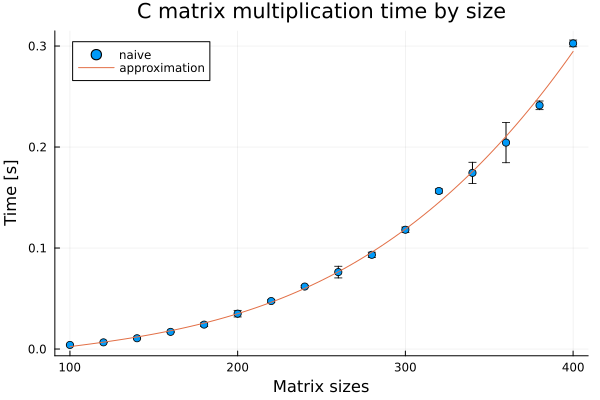

In [52]:
fit_poly = Polynomial(reverse(A \ y))
plot!(fit_poly, 100, 400, label="approximation")

## Zadanie 3

In [142]:
A = rand(5, 5)
A = A + A'
A1 = copy(A)

5×5 Matrix{Float64}:
 0.783208  1.60645   1.32966  0.704925  0.960131
 1.60645   0.433295  1.47381  0.299341  0.969461
 1.32966   1.47381   1.43938  0.78456   0.74278
 0.704925  0.299341  0.78456  1.30831   1.53936
 0.960131  0.969461  0.74278  1.53936   1.9559

In [143]:
for i in 1:10000
    Q, R = qr(A)
    A = R * Q
end
A

5×5 Matrix{Float64}:
 5.40608   4.82696e-16   6.21971e-16   1.38366e-15  -4.65028e-17
 0.0       1.6681       -2.3347e-15   -1.08448e-16  -4.39075e-16
 0.0      -1.0e-323     -1.11973       4.94818e-16   9.32934e-17
 0.0       0.0           0.0          -0.299397     -3.67987e-17
 0.0       0.0           0.0           5.0e-323      0.265023

In [148]:
abs.(A) .< 1e-14

5×5 BitMatrix:
 0  1  1  1  1
 1  0  1  1  1
 1  1  0  1  1
 1  1  1  0  1
 1  1  1  1  0

In [149]:
eigen(A1).values

5-element Vector{Float64}:
 -1.1197330714985128
 -0.29939695060269644
  0.26502318872971964
  1.6681048125966975
  5.406082752204952

In [152]:
[A[i, i] for i in 1:size(A)[1]]

5-element Vector{Float64}:
  5.406082752204943
  1.6681048125967013
 -1.1197330714985125
 -0.29939695060269456
  0.26502318872972236